# <center> **Tugas Praktikum 3**
Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

**Instruksi Umum:**

- Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
- Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

**Tugas 1: Multiple Linear Regression**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

**Catatan Tambahan:**

- Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
- Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

In [1]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sbn

In [3]:
# Mengimpor Dataset
dataset = pd.read_csv('insurance.csv')
dataset.head(100)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
95,28,female,37.620,1,no,southeast,3766.88380
96,54,female,30.800,3,no,southwest,12105.32000
97,55,male,38.280,0,no,southeast,10226.28420
98,56,male,19.950,0,yes,northeast,22412.64850


1. **Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


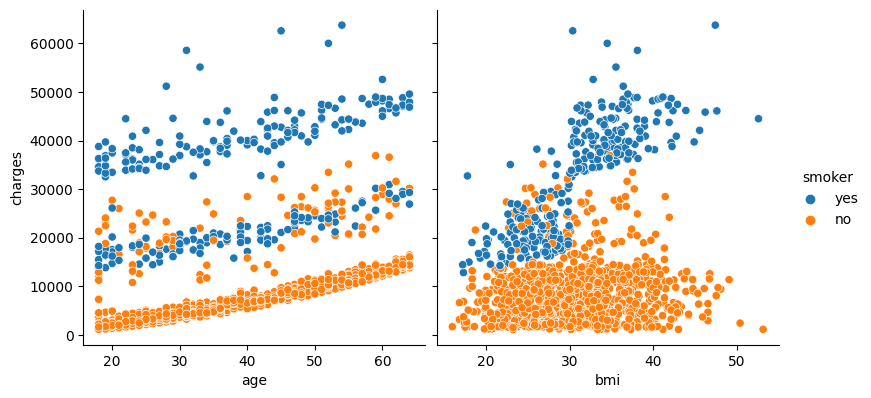

In [ ]:
sbn.pairplot(dataset, x_vars=['age', 'bmi'], y_vars='charges', size=4, aspect=1, kind='scatter', hue='smoker')
plt.show()

<ipython-input-4-6ff3e15fe828>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(dataset.corr(), cmap="crest", annot=True)


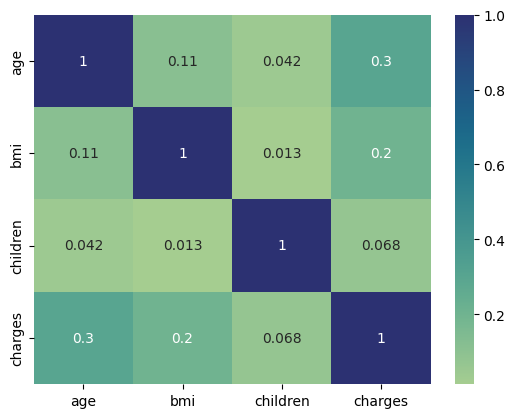

In [4]:
sbn.heatmap(dataset.corr(), cmap="crest", annot=True)
plt.show()

In [10]:
le = LabelEncoder()

dataset['smoker'] = le.fit_transform(dataset['smoker'])

> Berdasarkan data di atas dapat diidentifikasi bahwa terdapat koneksi yang kuat antara charges dan age juga BMI. Jadi, dapat disimpulkan bahwa biaya medis dapat berubah seiring dengan perubahan usia dan tingkat BMI.


2. **Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.**

In [12]:
X = dataset[['age', 'bmi', 'smoker']]
y = dataset['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

3. **Lakukan feature scaling jika diperlukan**

In [13]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

4. **Buat model multiple linear regression menggunakan Scikit-Learn.**

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_train)

print('Interceps = ', model.intercept_)
print('Koefisien = ', list(zip(X_train,model.coef_)))

Interceps =  -10266.243741232494
Koefisien =  [('age', 254.73532214869763), ('bmi', 282.1999801499842), ('smoker', 23473.686274839085)]


5. **Latih model pada data latih dan lakukan prediksi pada data uji.**

In [20]:
# Prediksi pada data uji
y_pred = model.predict(X_train)
# visualisasikan multiple linear predict
mlr_diff = pd.DataFrame({'Actual value': y_train, 'Predicted value': y_pred})
mlr_diff.head()

,Actual value,Predicted value
204,7147.10500,7744.640635
1264,10370.91255,11625.745382
313,8124.40840,12335.478332
1283,1720.35370,2793.457461
321,24671.66334,4721.282046


6. **Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.**

In [23]:
y_pred = linear_model.predict(x_test_scaled) # predict

r2 = r2_score(y_test, y_pred) # menghitung R-squared
mae = mean_absolute_error(y_test, y_pred) # menghitung MSE
mse = mean_squared_error(y_test, y_pred) # menghitung MAE

print(f"R-squared                 : {r2}")
print(f"MAE (Mean Absolute Error) : {mae}")
print(f"MSE (Mean Squared Error)  : {mse}")

R-squared                 : 0.7739854096622254
MAE (Mean Absolute Error) : 4132.800872726932
MSE (Mean Squared Error)  : 36285171.50287899


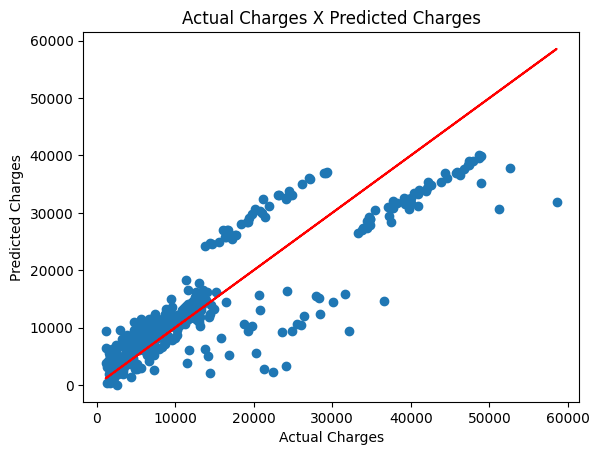

In [24]:
# visualisasi data
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test,'r')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges X Predicted Charges')
plt.show()